In [5]:
import os
import numpy as np
import trimesh
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

In [6]:
dataset_path = r"C:\Users\abdel\Desktop\3D_Teeth_Classification_Using_ConvNet\data"
categories = ['Canine', 'Deuxieme_molaire', 'Deuxieme_premolaire', 'Incisive_centrale', 
              'Incisive_laterale', 'Premiere_molaire', 'Premiere_premolaire']


In [7]:
def process_obj(path, target_size=(64, 64, 64)):
    mesh = trimesh.load_mesh(path)
    vertices = np.array(mesh.vertices)
    vertices = (vertices - vertices.min()) / (vertices.max() - vertices.min())
    volume = np.histogramdd(vertices, bins=target_size)[0]
    return volume

In [8]:
X, y = [], []
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for filename in os.listdir(category_path):
        if filename.endswith('.obj'):
            file_path = os.path.join(category_path, filename)
            try:
                processed = process_obj(file_path)
                X.append(processed)
                y.append(i)
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")


In [9]:
def explore_dataset(root_path):
    obj_paths = {}
    existing_categories = []

    # Explorer tous les sous-dossiers
    for root, dirs, files in os.walk(root_path):
        category = os.path.basename(root)
        if category in categories:
            obj_files = [os.path.join(root, f) for f in files if f.endswith('.obj')]
            if obj_files:
                obj_paths[category] = obj_files
                existing_categories.append(category)

    return obj_paths, existing_categories

In [10]:
obj_paths, existing_categories = explore_dataset(dataset_path)

In [11]:
print("Catégories trouvées:")
for category in existing_categories:
    print(f"- {category}")

missing_categories = set(categories) - set(existing_categories)
if missing_categories:
    print("\nCatégories attendues mais non trouvées:")
    for category in missing_categories:
        print(f"- {category}")

Catégories trouvées:
- Canine
- Deuxieme_molaire
- Deuxieme_premolaire
- Incisive_centrale
- Incisive_laterale
- Premiere_molaire
- Premiere_premolaire


In [12]:
print("\nNombre de fichiers .obj par catégorie:")
for category, paths in obj_paths.items():
    print(f"{category}: {len(paths)}")


Nombre de fichiers .obj par catégorie:
Canine: 32
Deuxieme_molaire: 28
Deuxieme_premolaire: 35
Incisive_centrale: 37
Incisive_laterale: 30
Premiere_molaire: 36
Premiere_premolaire: 35


In [13]:
total_files = sum(len(paths) for paths in obj_paths.values())
print(f"\nNombre total de fichiers .obj : {total_files}")


Nombre total de fichiers .obj : 233


In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
np.save('X_data.npy', X)
np.save('y_data.npy', y)

In [16]:
X = np.load('X_data.npy')
y = np.load('y_data.npy')


In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
for i, category in enumerate(obj_paths.keys()):
    print(f"\n{category}:")
    print(f"  Entraînement: {np.sum(y_train == i)}")
    print(f"  Validation: {np.sum(y_val == i)}")


Canine:
  Entraînement: 23
  Validation: 9

Deuxieme_molaire:
  Entraînement: 26
  Validation: 2

Deuxieme_premolaire:
  Entraînement: 29
  Validation: 6

Incisive_centrale:
  Entraînement: 31
  Validation: 6

Incisive_laterale:
  Entraînement: 22
  Validation: 8

Premiere_molaire:
  Entraînement: 29
  Validation: 7

Premiere_premolaire:
  Entraînement: 26
  Validation: 9


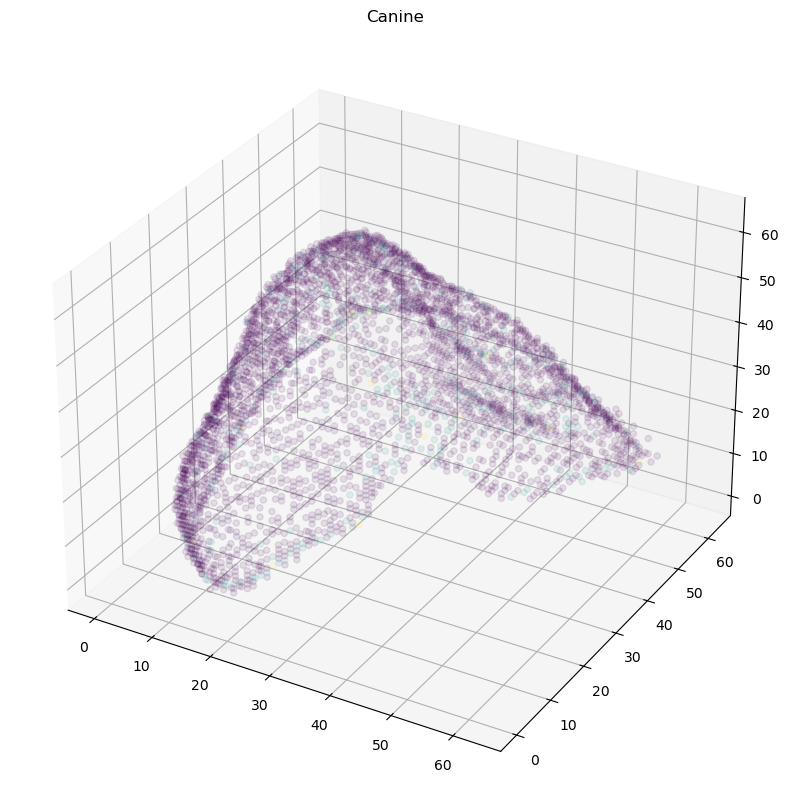

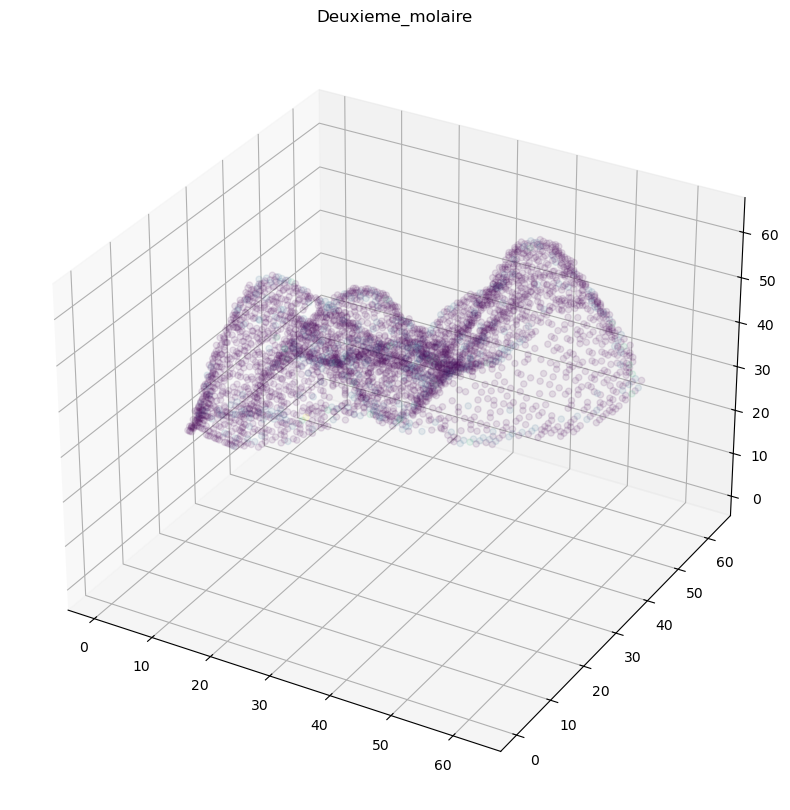

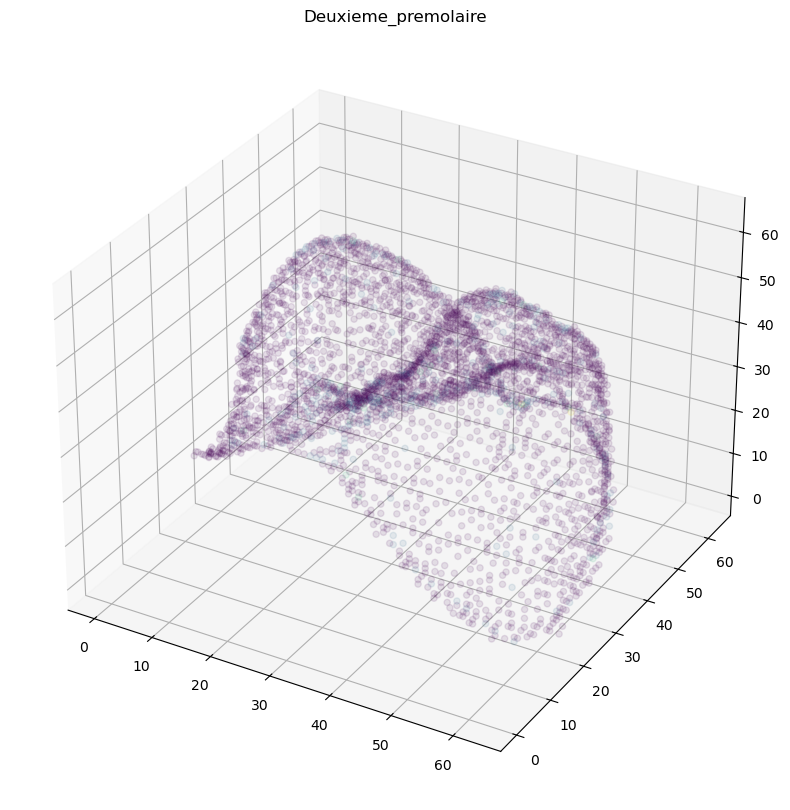

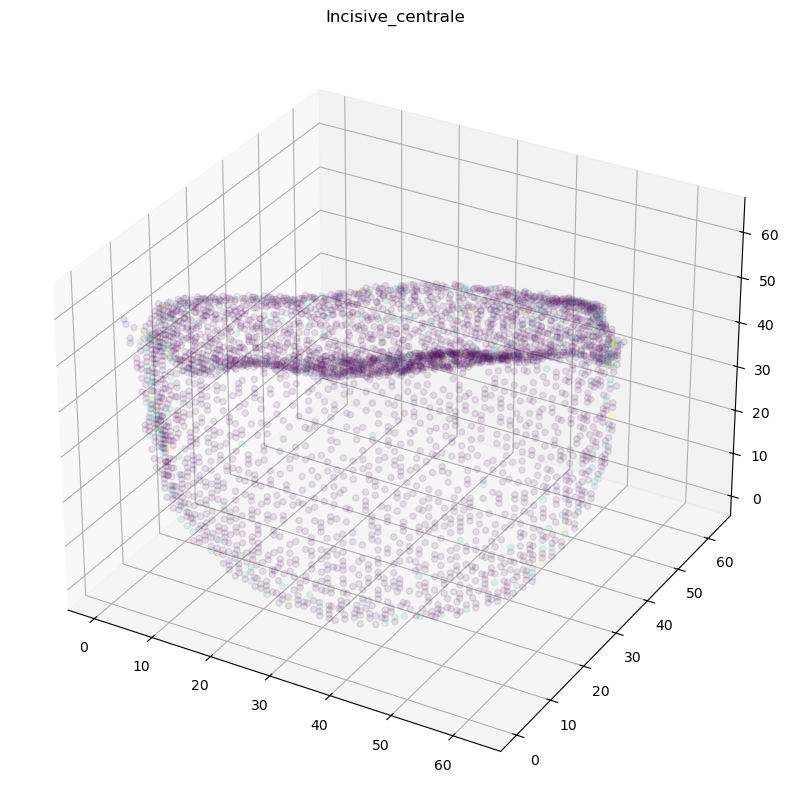

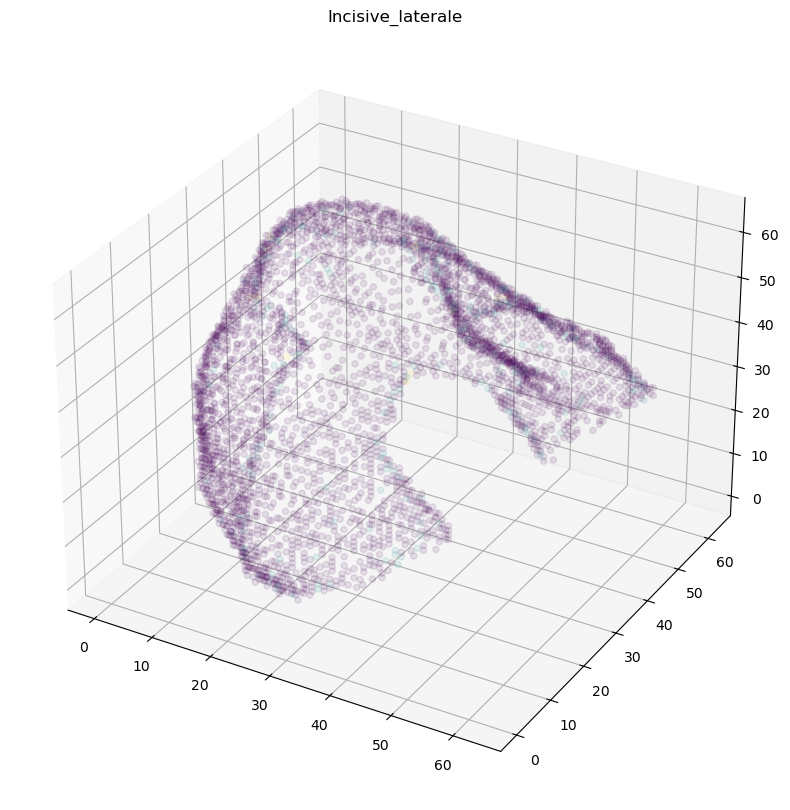

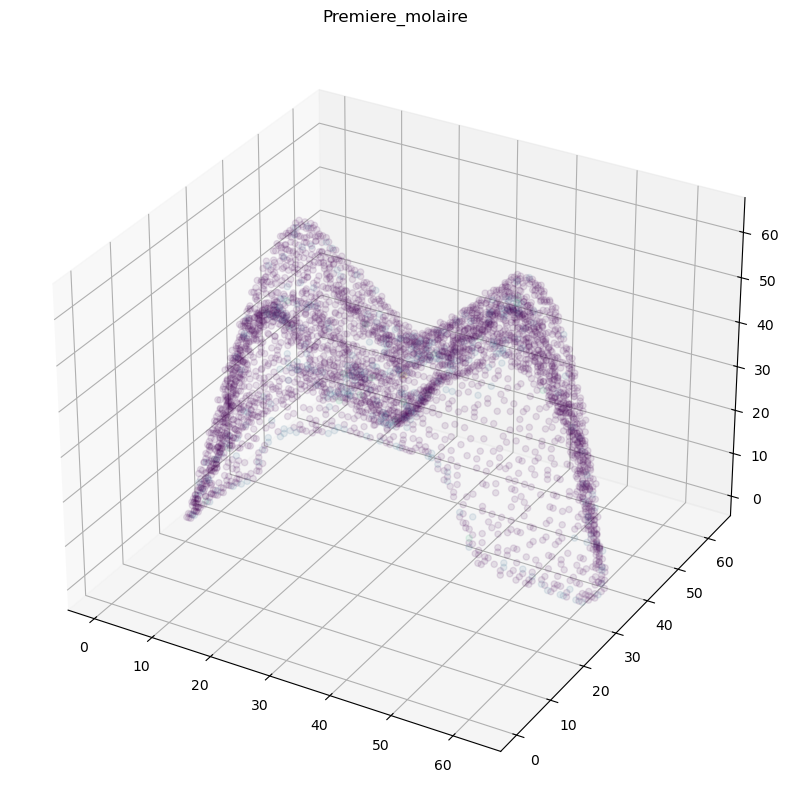

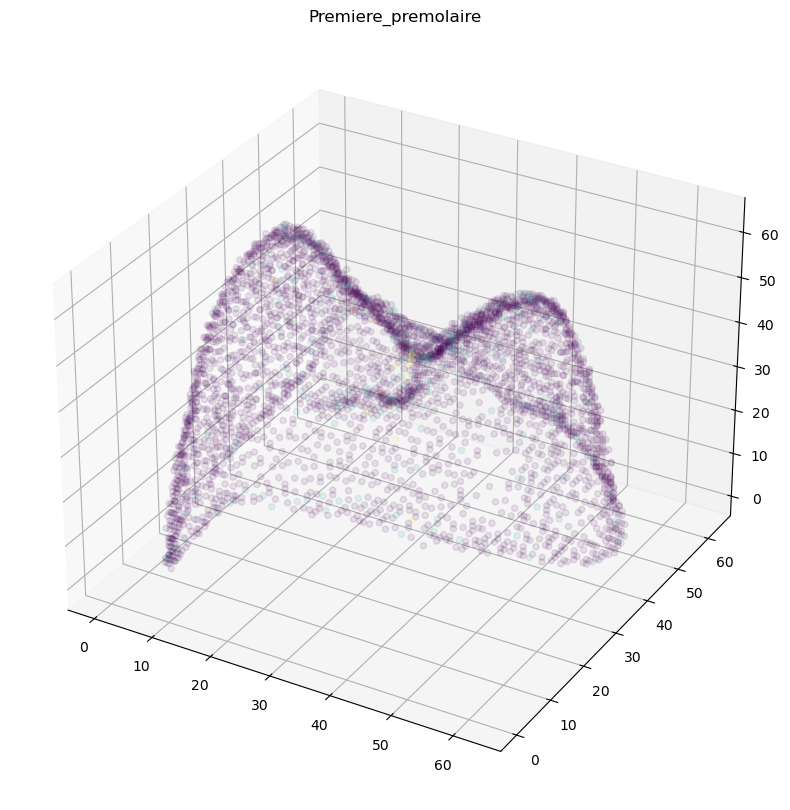

In [19]:
import matplotlib.pyplot as plt

def visualize_sample(sample, title):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = np.where(sample > 0)
    ax.scatter(x, y, z, c=sample[x, y, z], alpha=0.1)
    ax.set_title(title)
    plt.show()

# Visualiser un exemple de chaque catégorie
for i, category in enumerate(obj_paths.keys()):
    if i < len(X_train):
        sample = X_train[np.where(y_train == i)[0][0]]
        visualize_sample(sample, category)

Distribution des classes dans l'ensemble d'entraînement:
Canine: 23
Deuxieme_molaire: 26
Deuxieme_premolaire: 29
Incisive_centrale: 31
Incisive_laterale: 22
Premiere_molaire: 29
Premiere_premolaire: 26

Distribution des classes dans l'ensemble de validation:
Canine: 9
Deuxieme_molaire: 2
Deuxieme_premolaire: 6
Incisive_centrale: 6
Incisive_laterale: 8
Premiere_molaire: 7
Premiere_premolaire: 9


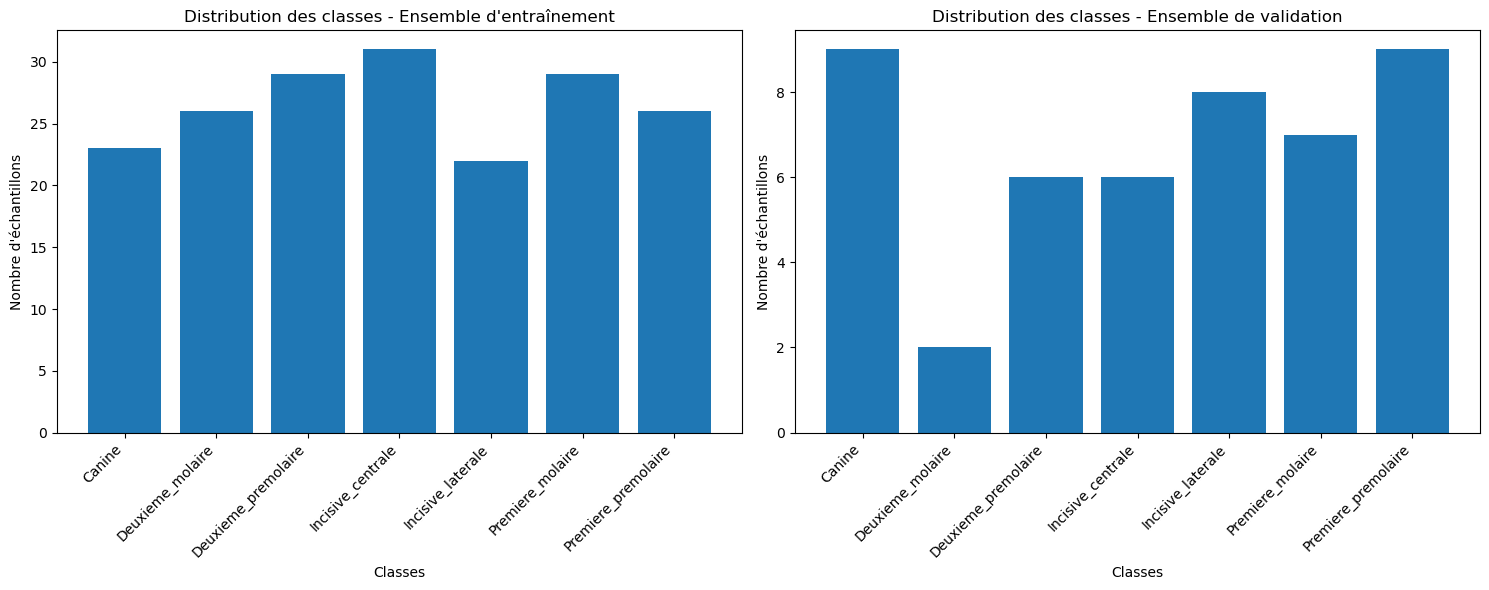


Proportions des classes dans l'ensemble d'entraînement:
Canine: 12.37%
Deuxieme_molaire: 13.98%
Deuxieme_premolaire: 15.59%
Incisive_centrale: 16.67%
Incisive_laterale: 11.83%
Premiere_molaire: 15.59%
Premiere_premolaire: 13.98%

Proportions des classes dans l'ensemble de validation:
Canine: 19.15%
Deuxieme_molaire: 4.26%
Deuxieme_premolaire: 12.77%
Incisive_centrale: 12.77%
Incisive_laterale: 17.02%
Premiere_molaire: 14.89%
Premiere_premolaire: 19.15%


In [20]:

def count_classes(labels):
    """Count the number of instances for each class"""
    unique, counts = np.unique(labels, return_counts=True)
    return dict(zip(unique, counts))

def plot_class_distribution(train_counts, val_counts, class_names):
    """Plot the distribution of classes in training and validation sets"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Training set
    ax1.bar(class_names, [train_counts.get(i, 0) for i in range(len(class_names))])
    ax1.set_title('Distribution des classes - Ensemble d\'entraînement')
    ax1.set_xlabel('Classes')
    ax1.set_ylabel('Nombre d\'échantillons')
    ax1.set_xticks(range(len(class_names)))
    ax1.set_xticklabels(class_names, rotation=45, ha='right')
    
    # Validation set
    ax2.bar(class_names, [val_counts.get(i, 0) for i in range(len(class_names))])
    ax2.set_title('Distribution des classes - Ensemble de validation')
    ax2.set_xlabel('Classes')
    ax2.set_ylabel('Nombre d\'échantillons')
    ax2.set_xticks(range(len(class_names)))
    ax2.set_xticklabels(class_names, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# Assuming y_train and y_val are your label arrays
train_counts = count_classes(y_train)
val_counts = count_classes(y_val)

# Define class names (adjust these to match your specific classes)
class_names = ['Canine', 'Deuxieme_molaire', 'Deuxieme_premolaire', 'Incisive_centrale', 
               'Incisive_laterale', 'Premiere_molaire', 'Premiere_premolaire']

# Print class counts
print("Distribution des classes dans l'ensemble d'entraînement:")
for i, name in enumerate(class_names):
    print(f"{name}: {train_counts.get(i, 0)}")

print("\nDistribution des classes dans l'ensemble de validation:")
for i, name in enumerate(class_names):
    print(f"{name}: {val_counts.get(i, 0)}")

# Plot class distribution
plot_class_distribution(train_counts, val_counts, class_names)

# Calculate and print class proportions
total_train = sum(train_counts.values())
total_val = sum(val_counts.values())

print("\nProportions des classes dans l'ensemble d'entraînement:")
for i, name in enumerate(class_names):
    proportion = train_counts.get(i, 0) / total_train * 100
    print(f"{name}: {proportion:.2f}%")

print("\nProportions des classes dans l'ensemble de validation:")
for i, name in enumerate(class_names):
    proportion = val_counts.get(i, 0) / total_val * 100
    print(f"{name}: {proportion:.2f}%")